In [3]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,62_ma,92_ma,Strategy,Asset_Returns,Strategy_Returns
Date,,,,,,,,,,
1993-02-01,24.553846,24.553846,24.397784,24.397784,480500,24.468541,24.468085,-1.0,0.007113,-0.007113
1993-02-02,24.605854,24.623194,24.484472,24.536493,201300,24.515796,24.515010,1.0,0.009246,-0.005010
1993-02-03,24.865965,24.883305,24.623201,24.640541,529400,24.607619,24.605630,1.0,0.019915,0.005509
1993-02-04,24.970001,25.022022,24.675216,24.952661,531500,24.684845,24.681707,1.0,0.024182,0.009716
1993-02-05,24.952671,25.004692,24.813949,24.952671,492100,24.733159,24.729357,1.0,0.023471,0.009015
...,...,...,...,...,...,...,...,...,...,...
2025-08-18,643.299988,644.000000,642.179993,642.859985,43804900,616.519001,607.271946,1.0,25.385908,5.605294
2025-08-19,639.809998,644.109985,638.479980,643.119995,69750700,617.258398,607.971690,1.0,25.242761,5.569459
2025-08-20,638.109985,639.659973,632.950012,639.400024,88890300,617.920353,608.619825,1.0,25.173032,5.552004


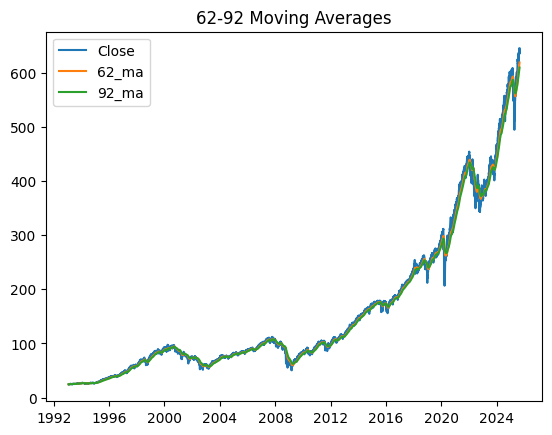

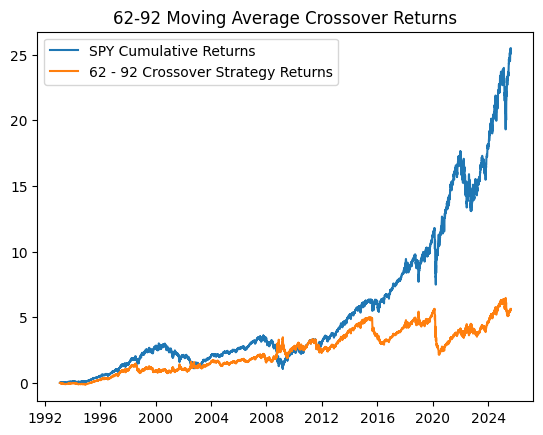

In [4]:
TICKER = 'SPY'
FAST = 62
SLOW = 92
LOOKBACK = 10000

def get_data():
    df = yf.download(TICKER)
    df.columns = df.columns.get_level_values(0)

    # only return the subset of data you are interested in
    return df.iloc[-LOOKBACK:, :]

def add_moving_averages(df, fast, slow):
    df[f'{FAST}_ma'] = df['Close'].ewm(span=fast).mean()
    df[f'{SLOW}_ma'] = df['Close'].ewm(span=slow).mean()

    plt.plot(df['Close'])
    plt.plot(df[f'{FAST}_ma'])
    plt.plot(df[f'{SLOW}_ma'])
    plt.legend(['Close', f'{FAST}_ma', f'{SLOW}_ma'])
    plt.title(f'{FAST}-{SLOW} Moving Averages');
    return df.dropna()

def add_strategy(df, fast, slow):
    
    # long when fast > slow, short otherwise
    df['Strategy'] = np.where(df[f'{fast}_ma'] > df[f'{slow}_ma'], 1, -1)
    df['Strategy'] = df['Strategy'].shift(1)
    return df

def test_strategy(df, ticker, fast, slow):
    df['Asset_Returns'] = (1 + df['Close'].pct_change()).cumprod() - 1
    df['Strategy_Returns'] = (1 + df['Close'].pct_change() * df['Strategy']).cumprod() -1

    plt.figure()
    plt.plot(df['Asset_Returns'])
    plt.plot(df['Strategy_Returns'])
    plt.legend([f'{ticker} Cumulative Returns', f'{fast} - {slow} Crossover Strategy Returns'])
    plt.title(f'{FAST}-{SLOW} Moving Average Crossover Returns'); 

    return df.dropna()

def main():
    df = get_data()
    df = add_moving_averages(df, FAST, SLOW)
    df = add_strategy(df, FAST, SLOW)
    df = test_strategy(df, TICKER, FAST, SLOW)

    return df

main()